In [4]:
from scipy.optimize import curve_fit,minimize
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import argparse
import os, sys
sys.path.append('/global/homes/s/shreeb/BAO_bispectrum')
from my_utils.call_data import CAMB
from my_utils.mcmc.mcmc import RunMCMC
from my_utils.utils import *

import scipy.interpolate as interpolate
from scipy import integrate
import math

from tqdm import tqdm
import emcee                    # for MCMC part

import pickle 

ModuleNotFoundError: No module named 'camb'

In [42]:
camb = CAMB()

In [13]:
list_H0 = np.linspace(64,72,10)
list_omch2 = np.linspace(0.112,0.142,10)
list_z = [0.5]

In [14]:
list_omch2

array([0.112     , 0.11533333, 0.11866667, 0.122     , 0.12533333,
       0.12866667, 0.132     , 0.13533333, 0.13866667, 0.142     ])

In [44]:
print((list_omch2+0.0226)/0.4096)

[0.32861328 0.3367513  0.34488932 0.35302734 0.36116536 0.36930339
 0.37744141 0.38557943 0.39371745 0.40185547]


In [45]:
print((list_omch2+0.0226)/0.5184)

[0.25964506 0.2660751  0.27250514 0.27893519 0.28536523 0.29179527
 0.29822531 0.30465535 0.31108539 0.31751543]


In [46]:
list_H0

array([64.        , 64.88888889, 65.77777778, 66.66666667, 67.55555556,
       68.44444444, 69.33333333, 70.22222222, 71.11111111, 72.        ])

In [47]:
list_omch2

array([0.112     , 0.11533333, 0.11866667, 0.122     , 0.12533333,
       0.12866667, 0.132     , 0.13533333, 0.13866667, 0.142     ])

In [48]:
k = 0
for h0 in list_H0:
    for omch in list_omch2: 
        results = camb.results(H0 = h0, ombh2 =  0.04825*(h0/100)**2, omch2 = omch, omk = -0.0, all_z = list_z);
        #print(results.get_derived_params())
        filename = f"infocamb_{int(h0*100)}{int(omch*10000)}_matterpower_z{''.join(map(str, list_z))}_{k:04}.npy"
        parent_folder = "/global/u1/s/shreeb/Project1/nobao_project/data/camb_python_info/"
        print(filename)
        #kh,z,pkh = results.get_matter_power_spectrum(maxkh = 0.3/0.7, npoints = 200)
        #print(pkh.shape)
        #pk_kh = np.vstack((kh,pkh)).T
        np.save(parent_folder + filename, results.get_derived_params())
        #plt.plot(kh,pkh[0]/pkh[1],label = f'{h0}-{omch}')
        k+=1
        #plt.legend()

infocamb_64001120_matterpower_z0.5_0000.npy
infocamb_64001153_matterpower_z0.5_0001.npy
infocamb_64001186_matterpower_z0.5_0002.npy
infocamb_64001220_matterpower_z0.5_0003.npy
infocamb_64001253_matterpower_z0.5_0004.npy
infocamb_64001286_matterpower_z0.5_0005.npy
infocamb_64001320_matterpower_z0.5_0006.npy
infocamb_64001353_matterpower_z0.5_0007.npy
infocamb_64001386_matterpower_z0.5_0008.npy
infocamb_64001419_matterpower_z0.5_0009.npy
infocamb_64881120_matterpower_z0.5_0010.npy
infocamb_64881153_matterpower_z0.5_0011.npy
infocamb_64881186_matterpower_z0.5_0012.npy
infocamb_64881220_matterpower_z0.5_0013.npy
infocamb_64881253_matterpower_z0.5_0014.npy
infocamb_64881286_matterpower_z0.5_0015.npy
infocamb_64881320_matterpower_z0.5_0016.npy
infocamb_64881353_matterpower_z0.5_0017.npy
infocamb_64881386_matterpower_z0.5_0018.npy
infocamb_64881419_matterpower_z0.5_0019.npy
infocamb_65771120_matterpower_z0.5_0020.npy
infocamb_65771153_matterpower_z0.5_0021.npy
infocamb_65771186_matterpower_z0

In [3]:
dp = np.load("/global/u1/s/shreeb/Project1/nobao_project/data/camb_python_info/infocamb_64001419_matterpower_z0.5_0009.npy",allow_pickle = True).item()

In [4]:
dp

{'age': 13.59692904618979,
 'zstar': 1095.6643200893586,
 'rstar': 140.9588053482246,
 'thetastar': 1.0589306620568921,
 'DAstar': 13.311429199190707,
 'zdrag': 1055.2488393840854,
 'rdrag': 144.44983506971874,
 'kd': 0.14119816831872076,
 'thetad': 0.16714605208607214,
 'zeq': 3865.779170870896,
 'keq': 0.011798258784547173,
 'thetaeq': 0.7459891874198483,
 'thetarseq': 0.4160426268805613}

In [49]:
results.get_Omega("baryon", z=0.0)

0.048250000000016585

In [ ]:
 0.04825

In [6]:
all_pars = {"H0" : 70, "ombh2" : 65}

In [8]:
all_pars.keys()

dict_keys(['H0', 'ombh2'])

kmax=0.3, kmin=0.015, nbins=2513, nmocks=922, hf = -0.5781544256120528
[ 7.71927148 12.40167771 11.2126521   8.73399419  6.83054353  5.75671373
  5.08501368  4.43011377  3.70214575  3.04855026  2.57932965  2.28361762
  2.07874193  1.88122212  1.66750367  1.46274551  1.29641064  1.17311055
  1.07758824  0.99324724  0.9105646   0.83132197  0.76040034  0.7001805
  0.64922719  0.60415731  0.56257734  0.52379175  0.48800516  0.45544131]


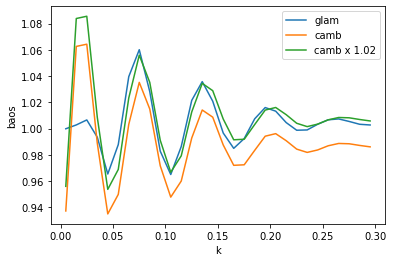

In [14]:


Bk=np.load("../Molino_mocks/bk_molino_z0.npz")
# Pk=np.load("../Molino_mocks/pk_molino_z0.npz")
# k,pk0,pk2,pk4=Pk['k'], Pk['pk0'], Pk['pk2'], Pk['pk4']
kk,bk0,bk2,bk4=Bk['kk'], Bk['bk0'], Bk['bk2'], Bk['bk4']
# pkm=np.mean(pk0,axis=1)
# bkm=np.mean(bk0,axis=1)

Bk=np.load("data/glam/bk_z0.50.npz")
Pk=np.load("data/glam/pk_z0.50.npz")
k,pkm,pknm,pk,pkn=Pk['k'], Pk['pkm'].T[0],Pk['pknm'].T[0],Pk['pk'],Pk['pkn']
kk,bkm,bknm,bk,bkn=Bk['k'], Bk['bkm'].T[0], Bk['bknm'].T[0],Bk['bk'],Bk['bkn']

glamw = pkm/pknm
plt.plot(k,glamw,label = "glam")

# kk=kk[np.where((kk[:,0]!=kk[:,1]) & (kk[:,0]!=kk[:,2]))]
# bkm=bkm[np.where((kk[:,0]!=kk[:,1]) & (kk[:,0]!=kk[:,2]))]
# bk=bk[np.where((kk[:,0]!=kk[:,1]) & (kk[:,0]!=kk[:,2]))]
# bknm=bknm[np.where((kk[:,0]!=kk[:,1]) & (kk[:,0]!=kk[:,2]))]
# bkn=bkn[np.where((kk[:,0]!=kk[:,1]) & (kk[:,0]!=kk[:,2]))]
# bk0=bk0[np.where((kk[:,0]!=kk[:,1]) & (kk[:,0]!=kk[:,2]))]


#getting glam full_bispectrum data and it's covariance 
kg,bg,bgn,cov,scaled_cov,_ = cutslice(0.015,0.3,kk,bkm,bk,bknm,bkn,bk0)
icov = np.linalg.inv(cov)

def prepare_pk(use_glam = False):
    if not use_glam:
        pkcamb = np.loadtxt("data/camb_python/camb_64001120_matterpower_z0.5_0000.dat")
        _,pknmf,pkmf = less_baoPk(pkcamb,k,5) ##to get the damped spectra
        pknmf = pknmf/np.mean(pknmf) * np.mean(pkm)
        pkmf = pkmf/np.mean(pkmf) * np.mean(pknm)
    else:
        pkmf = pkm
        pknmf = pknm
    
    return pkmf,pknmf

pkm,pknm = prepare_pk(use_glam = False)
cambw = pkm/pknm
print(pkm)
plt.plot(k,cambw,label = "camb")
plt.plot(k,cambw*1.02,label = "camb x 1.02")
plt.xlabel("k")
plt.ylabel('baos')
plt.legend()
def model(kk,*args):
    alpha,f,b1,b2,A= args

    #print(pkm,pknm)

    pk1=np.interp(alpha*kk[:,0],k,pkm)
    pk2=np.interp(alpha*kk[:,1],k,pkm)
    pk3=np.interp(alpha*kk[:,2],k,pkm)

    pkn1=np.interp(alpha*kk[:,0],k,pknm)
    pkn2=np.interp(alpha*kk[:,1],k,pknm)
    pkn3=np.interp(alpha*kk[:,2],k,pknm)

    #res = Bi_meas(kk, pk1,pk2,pk3,pkn1,pkn2,pkn3,alpha,f,b1,b2, f1,b11,b21 )
    bfa = np.array(Bi0(alpha*kk, pk1,pk2,pk3,f,b1,b2))
    bsa = np.array(Bi0(alpha*kk, pkn1,pkn2,pkn3,f,b1,b2))
    bs = np.array(Bi0(kk, pkn1,pkn2,pkn3,f,b1,b2))
    #bw = np.array(Bi0(alpha*kk, pk1,pk2,pk3,f,b1,b2))/np.array(Bi0(alpha*kk, pkn1,pkn2,pkn3,f,b1,b2))

    return bfa/bsa*bs

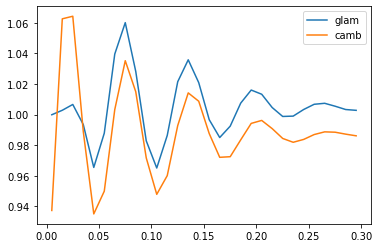

In [15]:
plt.plot(k[np.where(k>0.0)],glamw[np.where(k>0.0)],label = "glam")
plt.plot(k[np.where(k>0.0)],cambw[np.where(k>0.0)],label = "camb")
plt.legend()


In [24]:
k[np.where(glamw)]

array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
       0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
       0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
       0.275, 0.285, 0.295])

In [25]:
# model = lambda kk,alpha,f,b1,b2,f1,b11,b21 : Bi_meas(kk, pk1,pk2,pk3,pkn1,pkn2,pkn3,alpha,f,b1,b2,f,b1,b2)
# model_wig = lambda kk,f,b1,b2 : Bi_wiggle(kk,pk1,pk2,pk3, pkn1,pkn2,pkn3, f, b1, b2)
# model_full=  lambda kk,alpha,f,b1,b2 : Bi0(alpha*kk,pk1,pk2,pk3 ,f, b1, b2)

In [31]:
k1,k2,k3=kg[:,0],kg[:,1],kg[:,2]
r=np.array(k1*k2*k3)**2
b0 = [1, 0.17356491,  1.91384586, -0.80008999,1]
bopt, bcov = curve_fit(model,kg,bgn,b0,maxfev=100000)

In [32]:
bopt

array([ 0.76984371,  0.0857446 ,  1.58744918, -0.55063981,  1.        ])

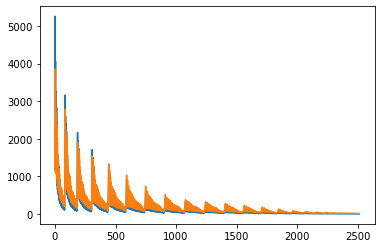

In [28]:
#bfg = 4.5*model(kg,1, 0.1, 1, -0.25,1)
plt.plot(model(kg,*bopt))
plt.plot(bg)
#plt.plot(bfg)


(0.0, 1.0)

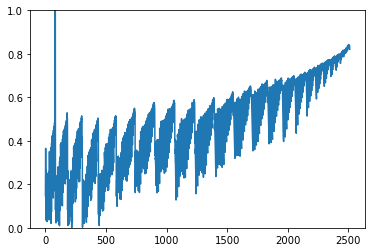

In [29]:
#plt.plot(np.abs(bg-bfg)/bg)
plt.plot(np.abs(bg-model(kg,*bopt))/bg)
plt.ylim(0,1)

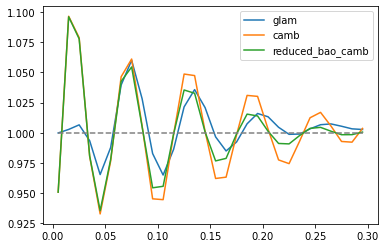

In [9]:
plt.plot(k,pkm/pknm, label = "glam")
plt.plot(k,fpk/ps, label = "camb")
plt.plot(k,less_baoPk(pcamb,k,4.5)/ps, label = "reduced_bao_camb")
plt.plot(k,[1]*len(k),"--",color = "gray")


plt.legend()

For kmax = 0.2, [ 1.        , -0.11796866,  1.94064156, -0.35380374]

For kmax = 0.3, [1.02921744, 1.05416385, 1.1561273 , 0.45504566]

100%|██████████| 1/1 [00:00<00:00, 65.99it/s]


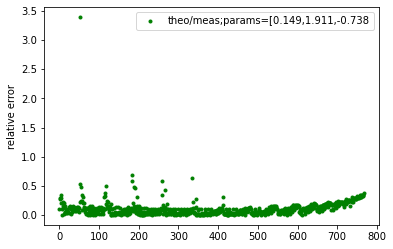

In [150]:
theow4 = model(kg,*bopt)
meas = bg/bgn
for i in tqdm(range(1)):
    plt.plot(np.abs(meas-theow4)/meas, ".", color = "green", label = "theo/meas;params=[0.149,1.911,-0.738")
    plt.ylabel("relative error")
    plt.legend()



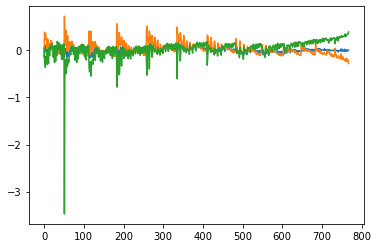

In [155]:
plt.plot(meas-theow/meas)
plt.plot(meas-theow2/meas)
plt.plot(meas-theow3/meas)

100%|██████████| 1/1 [00:00<00:00, 65.82it/s]


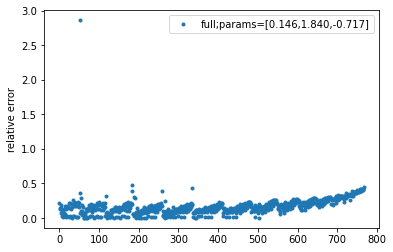

In [57]:
theo = model(kg,*bopt)
for i in tqdm(range(1)):
    plt.plot(np.abs(bg-theo)/bg, ".", label = "full;params=[0.146,1.840,-0.717]")
    plt.ylabel("relative error")
    plt.legend()

100%|██████████| 1/1 [00:00<00:00, 79.92it/s]


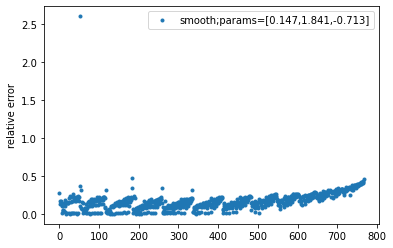

In [34]:
theon = model(kg,*bopt)
for i in tqdm(range(1)):
    plt.plot(np.abs(bgn-theon)/bgn, ".", label = "smooth;params=[0.147,1.841,-0.713]")
    plt.ylabel("relative error")
    plt.legend()

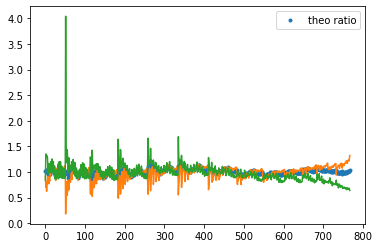

In [158]:
#plt.plot(bg/bgn,".",label = "meas full/meas smooth")
#plt.plot(np.array(theo)/np.array(theon),".",label="theo full/theo smooth")
plt.plot(theow,".",label = "theo ratio")
plt.plot(theow2)
plt.plot(theow3)
plt.legend()


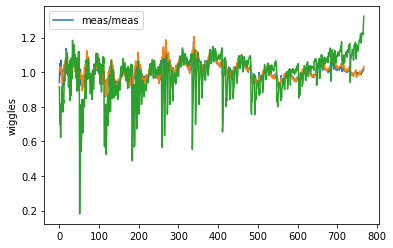

In [115]:
# plt.plot(bg/theon, label = "theo/meas")
#plt.plot(bg/bgn, label = "meas/meas")
# plt.plot(theo/theon, label = "theo/theo")
plt.plot(theow)
plt.plot(theow2)
plt.ylabel("wiggles")
plt.legend()

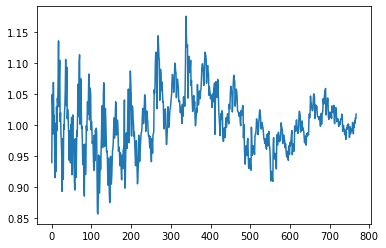

In [99]:
plt.plot(bg/bgn)

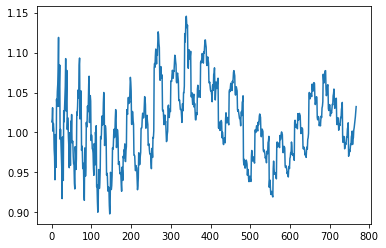

In [101]:
plt.plot(theo/theon)

In [50]:
kg[np.where(np.abs(meas-theo)/meas > 0.05)]

array([[0.025, 0.025, 0.025],
       [0.035, 0.035, 0.035],
       [0.035, 0.055, 0.065],
       [0.045, 0.045, 0.045],
       [0.045, 0.065, 0.065],
       [0.045, 0.075, 0.075],
       [0.055, 0.055, 0.055],
       [0.055, 0.055, 0.065],
       [0.055, 0.055, 0.075],
       [0.055, 0.065, 0.065],
       [0.055, 0.065, 0.075],
       [0.055, 0.075, 0.075],
       [0.065, 0.075, 0.075],
       [0.075, 0.075, 0.075],
       [0.085, 0.085, 0.085]])

In [24]:
(np.abs(bg[51]-theo[51]))/bg[51]

2.644119336464086

In [18]:
# pk1=np.interp(kg[:,0],k,pkm)
# pk2=np.interp(kg[:,1],k,pkm)
# pk3=np.interp(kg[:,2],k,pkm)

# pkn1=np.interp(2*kg[:,0],k,pkm)
# pkn2=np.interp(2*kg[:,1],k,pkm)
# pkn3=np.interp(2*kg[:,2],k,pkm)

# b1 = np.array(Bi0(kg,pk1,pk2,pk3 ,-44.09019751,  -2.51493536,  38.3087261))
# b2 = np.array(Bi0(kg,pk1,pk2,pk3 ,-1.90374567e+00, -2.20685074e+03, -1.34904049e+02))
# b3 = np.array(Bi0(kg,pk1,pk2,pk3 ,0.14487539,  1.83420633, -0.71007248))
# #plt.plot(np.abs(bg/b2),"blue")
# #plt.plot(np.abs(bg/b1),"red")
# plt.plot(np.abs(bg/b3),"green")



In [19]:
# pk1=np.interp(kg[:,0],k,pkm)
# pk2=np.interp(kg[:,1],k,pkm)
# pk3=np.interp(kg[:,2],k,pkm)

# pkn1=np.interp(kg[:,0],k,pknm)
# pkn2=np.interp(kg[:,1],k,pknm)
# pkn3=np.interp(kg[:,2],k,pknm)

# bf1 = np.array(Bi0(kg,pk1,pk2,pk3 ,-44.09019751,  -2.51493536,  38.3087261))
# bf2 = np.array(Bi0(kg,pk1,pk2,pk3 ,0.14487539,  1.83420633, -0.71007248))
# bs1 = np.array(Bi0(kg,pkn1,pkn2,pkn3 ,0.14487539,  1.83420633, -0.71007248))
# bs2 = np.array(Bi0(kg,pkn1,pkn2,pkn3 ,0.14487539,  1.83420633, -0.71007248))
# bw1 = bf1/bs1
# bw2 = bf2/bs2
# plt.plot(bw1,".")
# plt.plot(bw2,".",label="smooth")
# plt.plot(bkm/bknm,".",label = "data")
# plt.xlim(500,1000)
# plt.ylim(0.9,1.1)
# plt.legend()
# #plt.plot(np.abs(bg/b3),"green")

In [20]:
# b1 = model(kg,*[ 1,0.14487539,  -1.83420633, -0.71007248, 0.14487539,  -1.83420633, -0.71007248])
# b2 = model(kg,*bopt)
# for i in tqdm(range(1)):
#     #plt.plot(bg-b1)
#     plt.plot(bg-b2)

# #plt.plot(bg)

In [9]:
from astropy.cosmology import FlatLambdaCDM
z = 0.5

omb = 0.04825
ccamb = FlatLambdaCDM(H0=64, Om0 = omb + 0.1419/(64/100)**2)
cglam = FlatLambdaCDM(H0=67.77, Om0=0.307)

rsglam = 147.82
rscamb = 144.44983506971874

In [10]:
omb + 0.1419/(64/100)**2

0.394685546875

In [11]:
0.04825 + 0.1419/((64/100)**2)

0.394685546875

In [12]:
dcamb = ccamb.comoving_distance(z)
dglam = cglam.comoving_distance(z)

In [13]:
alpha = (dcamb/rscamb)/(dglam/rsglam)

In [14]:
alpha

<Quantity 1.05275702>

In [15]:
np.abs(alpha-1.079)/alpha*100

<Quantity 2.49278633>

In [29]:
from astropy.cosmology import FlatLambdaCDM
z = 0.5

ccamb = FlatLambdaCDM(H0=70, Om0=0.288245)
cglam = FlatLambdaCDM(H0=67.77, Om0=0.307)

rsglam = 147.82
rscamb = 147.38
dcamb = ccamb.comoving_distance(z)
dglam = cglam.comoving_distance(z)


In [30]:
alpha = (dcamb/rscamb)/(dglam/rsglam)

In [32]:
(alpha-0.971)/alpha * 100

<Quantity 0.6530267>

In [28]:
alpha

<Quantity 1.00954375>

In [30]:
from pathlib import Path
filepaths="data/camb"
for file in os.listdir(filepaths):
    if file[-3:] == "dat":
        filepath = filepaths +"/" + file
        output_path = "/home/jayashreeb/Documents/Power_Bi/nobao_project/mcmc_parallel_results/mcmc_" + Path(filepath).stem + ".h5"
        print(filepath,"\n",output_path)

data/camb/camb_66651515_matterpower_z0.5.dat 
 /home/jayashreeb/Documents/Power_Bi/nobao_project/mcmc_parallel_results/mcmc_camb_66651515_matterpower_z0.5.h5
data/camb/camb_52438487_matterpower_z0.dat 
 /home/jayashreeb/Documents/Power_Bi/nobao_project/mcmc_parallel_results/mcmc_camb_52438487_matterpower_z0.h5
data/camb/camb_40423919_matterpower_z0.3.dat 
 /home/jayashreeb/Documents/Power_Bi/nobao_project/mcmc_parallel_results/mcmc_camb_40423919_matterpower_z0.3.h5
data/camb/camb_28143207_matterpower_z0.5.dat 
 /home/jayashreeb/Documents/Power_Bi/nobao_project/mcmc_parallel_results/mcmc_camb_28143207_matterpower_z0.5.h5
data/camb/camb_29058986_matterpower_z0.dat 
 /home/jayashreeb/Documents/Power_Bi/nobao_project/mcmc_parallel_results/mcmc_camb_29058986_matterpower_z0.h5
data/camb/camb_25812257_matterpower_z0.dat 
 /home/jayashreeb/Documents/Power_Bi/nobao_project/mcmc_parallel_results/mcmc_camb_25812257_matterpower_z0.h5


In [3]:
for i in range(20):
    print (f"{i:04}.npy")

0000.npy
0001.npy
0002.npy
0003.npy
0004.npy
0005.npy
0006.npy
0007.npy
0008.npy
0009.npy
0010.npy
0011.npy
0012.npy
0013.npy
0014.npy
0015.npy
0016.npy
0017.npy
0018.npy
0019.npy


In [ ]:
for file in os.listdir(pa):
    if file.endswith(f"{i:04d}.npy"):
        